<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h3 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment</h4>
<h5 align="center"><font color="cyan"> Feel free to contact TA team for any possible questions about the assignment </font>
 </h5>
<h5 align="center"> <font color="cyan"> Questions 1,2: @Ilia_ad7  -  Question 3: @MhShafieizadegan </font> </h5>

You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

## 1. Prediction with Least Squares
* Fit a polynomial of degree $K$ to all columns of the following dataset
to predict number of "Cars" and "Buses" in the years of $2016$,$2017$,$2018$,$2019$ and $2020$.


$$
y_i = \sum_{k=0}^K w_k x_{i}^k + \epsilon_i
$$


Change the value of $K$ from 3 to 5. For each degree, plot the data and your model fit and compare the results.

``(25 pt.)``


<h3>
<div style="text-align: right">
  <span style='font-family:vazirmatn,Baghdad,Tahoma'>  
  
محمد مرسلی

40010956
   </span>
 </div> </h3>

In [116]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
df = pd.read_csv('arac.csv',delimiter=';')
print(df)


    Year       All       Car  Minibus     Bus  SmallTruck   Truck  Motorcycle  \
0   1966    231977     91469    10913   12041       31462   47931       32099   
1   1967    284194    112367    16008   13332       39927   56889       39647   
2   1968    318768    125375    18967   13948       43441   62616       47062   
3   1969    354398    137345    20540   15529       48655   69478       52959   
4   1970    369808    137771    20916   15980       52152   70730       60994   
5   1971    403880    153676    22380   17140       57011   73433       68417   
6   1972    460087    187272    25559   18504       62796   78920       74402   
7   1973    543318    240360    30055   20011       71043   86780       80860   
8   1974    647947    313160    34122   21404       81025   95309       86028   
9   1975    785920    403546    40623   23763       98579  108381       91421   
10  1976    920141    488894    46066   25388      116861  122176       96984   
11  1977   1042239    560424

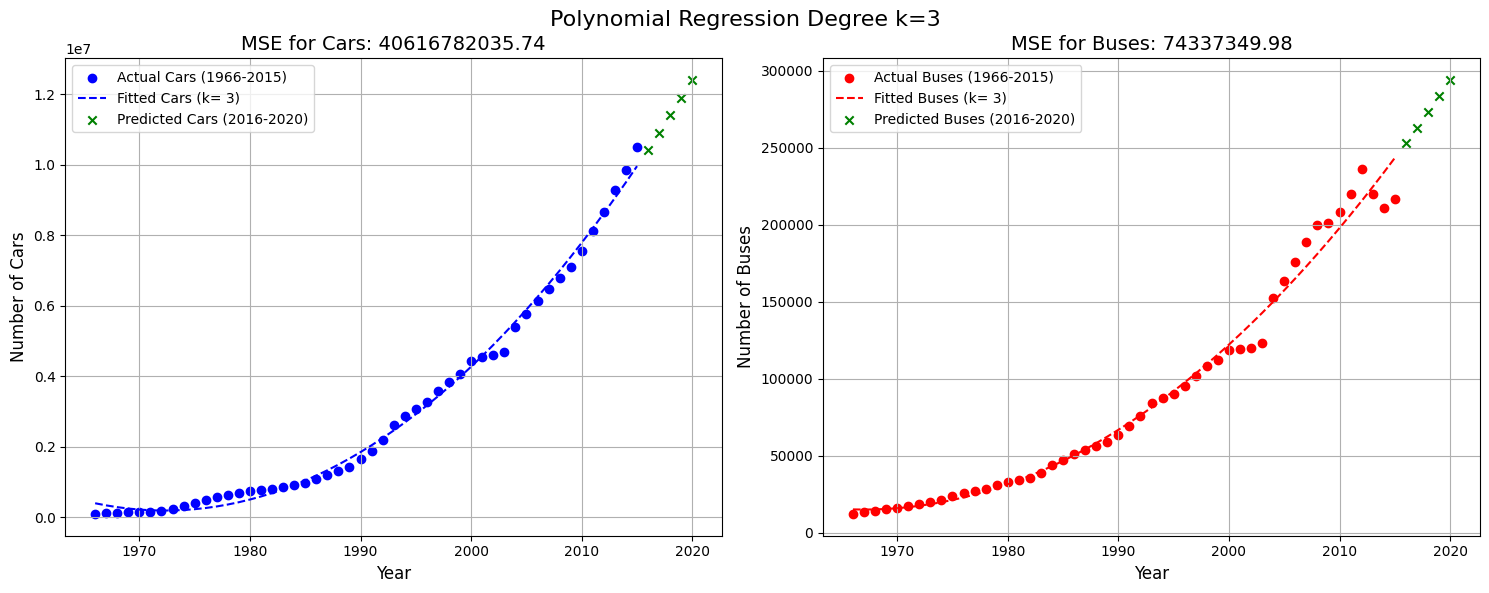

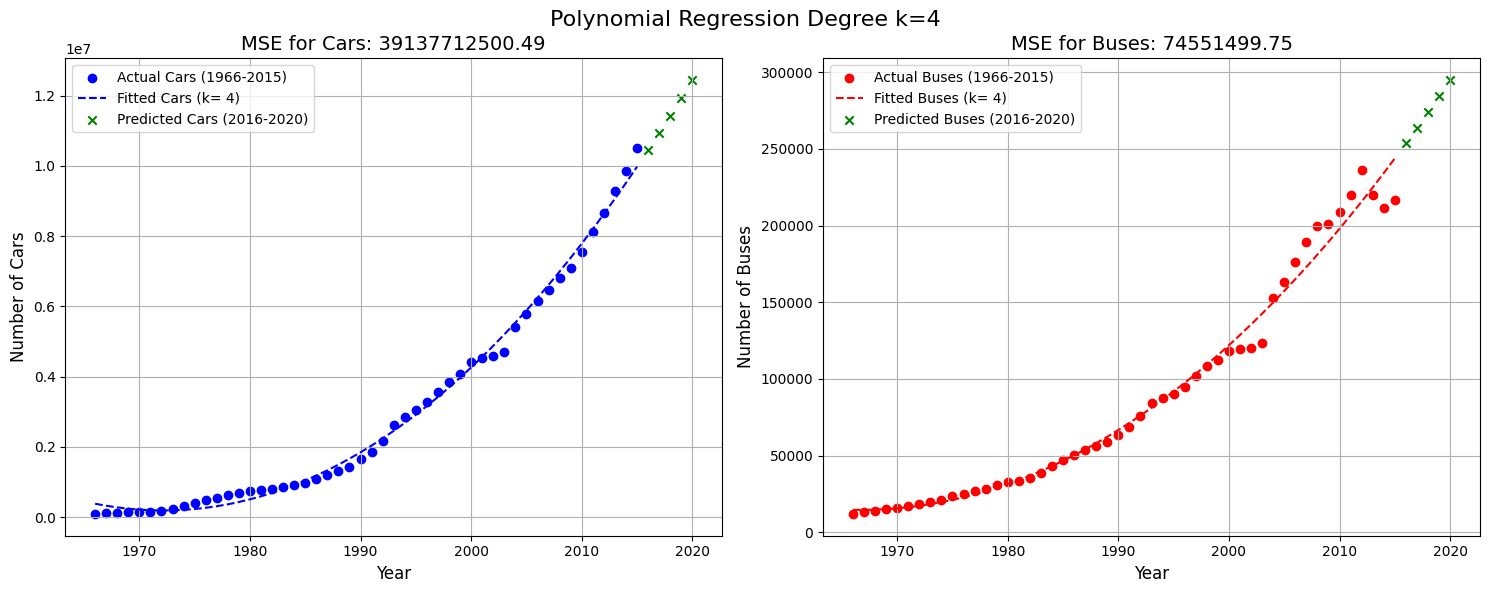

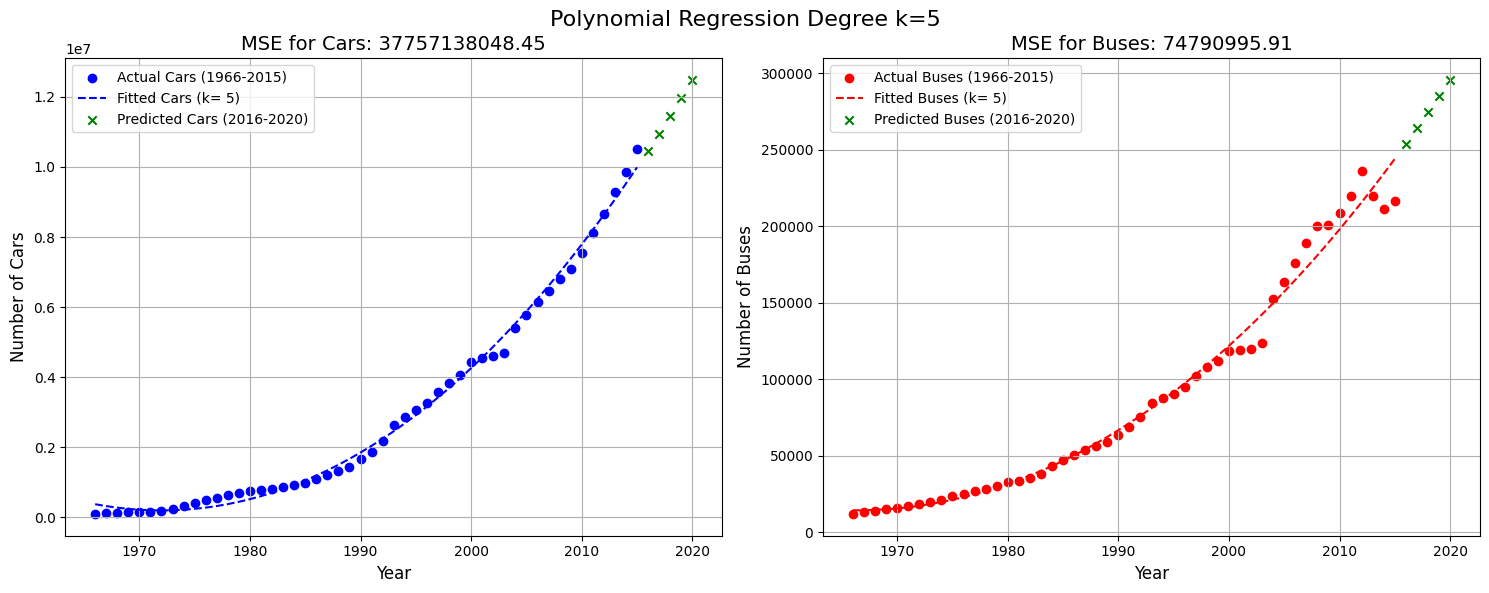

In [21]:
# Extract the 'Year', 'Car', and 'Bus' data from the DataFrame and store them in numpy arrays
years = df['Year'].values
cars = df['Car'].values
buses = df['Bus'].values

# Define the degrees for the polynomial regression
k=[3,4,5]

# Perform polynomial regression for each degree in k
for i in k:
    # Create a Vandermonde matrix with i + 1 columns
    X = np.vander(years, i + 1)
    
    # Perform least squares regression for 'Car' data and get the coefficients
    coefCars, _, _, _ = np.linalg.lstsq(X, cars, rcond=None)
    
    # Create a polynomial function from the coefficients
    polyCars = np.poly1d(coefCars)
    
    # Compute the fitted 'Car' values
    fittedCars = polyCars(years)
    
    # Perform least squares regression for 'Bus' data and get the coefficients
    coefBuses, _, _, _ = np.linalg.lstsq(X, buses, rcond=None)
    
    # Create a polynomial function from the coefficients
    polyBuses = np.poly1d(coefBuses)
    
    # Compute the fitted 'Bus' values
    fittedBuses = polyBuses(years)
    
    # Define the future years for prediction
    future = np.array([2016, 2017, 2018, 2019, 2020])
    
    # Predict the number of cars and buses for the future years
    predictedCars = polyCars(future)
    predictedBuses = polyBuses(future)
    
    # Compute the mean squared error (MSE) for the fitted 'Car' and 'Bus' values
    mseCars = np.mean((fittedCars - cars)**2)
    mseBuses = np.mean((fittedBuses - buses)**2)
    
    # Create a subplot with 1 row and 2 columns
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    
    # Set the title for the figure
    fig.suptitle(f'Polynomial Regression Degree k={i}', fontsize=16)

    # Plot the actual and fitted 'Car' data and the predictions for the future years
    axs[0].scatter(years, cars, label='Actual Cars (1966-2015)', color='blue', marker='o')
    axs[0].plot(years, fittedCars, label=f'Fitted Cars (k= {i})', color='blue', linestyle='dashed')
    axs[0].scatter(future, predictedCars, label=f'Predicted Cars (2016-2020)', color='green', marker='x')
    
    # Set the title, labels, and legend for the 'Car' plot
    axs[0].set_title(f'MSE for Cars: {mseCars:.2f}', fontsize=14)
    axs[0].set_xlabel('Year', fontsize=12)
    axs[0].set_ylabel('Number of Cars', fontsize=12)
    axs[0].legend()
    
    # Add gridlines to the 'Car' plot
    axs[0].grid(True)

    # Plot the actual and fitted 'Bus' data and the predictions for the future years
    axs[1].scatter(years, buses, label='Actual Buses (1966-2015)', color='red', marker='o')
    axs[1].plot(years, fittedBuses, label=f'Fitted Buses (k= {i})', color='red', linestyle='dashed')
    axs[1].scatter(future, predictedBuses, label=f'Predicted Buses (2016-2020)', color='green', marker='x')
    
    # Set the title, labels, and legend for the 'Bus' plot
    axs[1].set_title(f'MSE for Buses: {mseBuses:.2f}', fontsize=14)
    axs[1].set_xlabel('Year', fontsize=12)
    axs[1].set_ylabel('Number of Buses', fontsize=12)
    axs[1].legend()
    
    # Add gridlines to the 'Bus' plot
    axs[1].grid(True)

    # Adjust the layout of the figure
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    
    # Display the figure
    plt.show()

## 2. KMeans Clustering (LSE approach)

You are given a dataset of **600** points in a **2-dimensional** space, which have come from **3 different distributions**. The dataset is stored in a file called **Image.csv**, which has two columns: **x** and **y**. You want to use **K-means** to cluster the data points into **K** groups, and analyze the results.

- Part 1: Write a Python function called **load_data** that takes the file name **Image.csv** as an input and returns a numpy array **X**. **X** should be a **600 by 2** matrix, where each row is a point in the 2-dimensional space. ``(5 pt.)``

[[ 3.69959867  3.89235252]
 [ 2.6413343   2.97095728]
 [-1.66329434  3.35560306]
 ...
 [ 0.5785215   0.34965446]
 [ 2.6710785   2.30721969]
 [-1.04525337  1.21114529]]


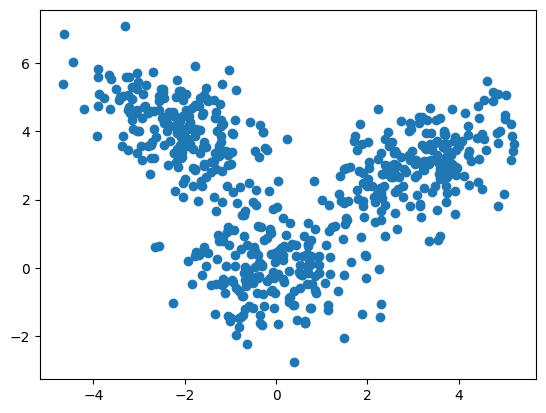

In [33]:
def load_data(file_name):
    # Convert the DataFrame into a numpy array and return it
    X = np.genfromtxt(file_name, delimiter=',')
    return X
    
Y = load_data('Image.csv')
print(Y)
plt.scatter(Y[:,0],Y[:,1])


- Part 2: Write a Python function called **kmeans** that takes **X** and **K** as inputs and returns two numpy arrays: **M** and **U**. Use the **K-means(LSE approach)** algorithm as described below to find the optimal cluster centroids and assignments. ``(15 pt.)``

The general approach of the k-means clustering algorithm is as follows:

- The algorithm takes two inputs: the data matrix X of size n by d, where n is the number of data points and d is the dimension of each data point, and the number of clusters K.
- The algorithm outputs two matrices: the cluster centroid matrix M of size K by d, where each row represents the coordinates of a cluster center, and the cluster assignment matrix U of size n by K, where each row represents the membership of a data point to a cluster.
- The algorithm works by first initializing the M matrix randomly from the data points in X; and then iteratively updating the cluster centroids and the cluster assignments until convergence, which means that the total squared error between the data points and their assigned cluster centroids does not change.
- The algorithm uses the least squares error (LSE) method to measure the quality of the clustering. The LSE method is a way of quantifying how well the cluster centroids fit the data points, by minimizing the sum of the squared distances between each data point and its assigned cluster centroid. The LSE method is used in both steps of the algorithm: assigning the data points to the nearest cluster centroid, and updating the cluster centroids as the mean of the assigned data points.


In [35]:
from scipy.spatial import distance

def kmeans(data, num_clusters):
    num_samples = data.shape[0]
    
    # Initialize centroids randomly
    centroids = data[np.random.choice(num_samples, num_clusters, replace=False)]
    
    max_iterations = 100
    for _ in range(max_iterations):
        # Compute distances from each point to each centroid
        distances = distance.cdist(data, centroids, 'euclidean')
        
        # Assign each point to the closest centroid
        labels = np.argmin(distances, axis=1)
        
        # Compute new centroids as the mean of the points in each cluster
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(num_clusters)])
        
        centroids = new_centroids

    return centroids, labels

- Part 3: Write a Python function called **plot_clusters** that takes **X**, **M**, and **U** as inputs and plots the data points and the centroids on a 2-dimensional plane. Use different colors and markers for the different clusters, and draw a circle around each centroid. Label the axes as **x** and **y**, and add a title and a legend to the plot. ``(10 pt.)``

In [45]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def plot_clusters(data, centroids, labels):
    num_clusters = centroids.shape[0]
    
    # Create a new figure with increased size
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Plot data points with increased size and alpha for better visibility
    scatter = ax.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, label='Data Points')
    
    # Plot centroids and circles around them
    for i in range(num_clusters):
        # Plotting centroids with increased size
        ax.scatter(centroids[i, 0], centroids[i, 1], color='deeppink', marker='x', s=100, label=f'Centroid {i+1}')
        
        # Calculate the maximum distance from the centroid to any point in the cluster
        cluster_radius = np.max(np.linalg.norm(data[labels == i] - centroids[i], axis=1))
        
        # Plotting circles with dashed line style
        circle = Circle((centroids[i, 0], centroids[i, 1]), cluster_radius, color='red', fill=False, linestyle='dashed')
        ax.add_patch(circle)
    
    # Adding grid for better precision
    ax.grid(True)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('KMeans Clustering (LSE approach)')    
    ax.legend()
    
    # Show the plot
    plt.show()

**<font color="red"> Don't edit the code in the following cell!</font>**

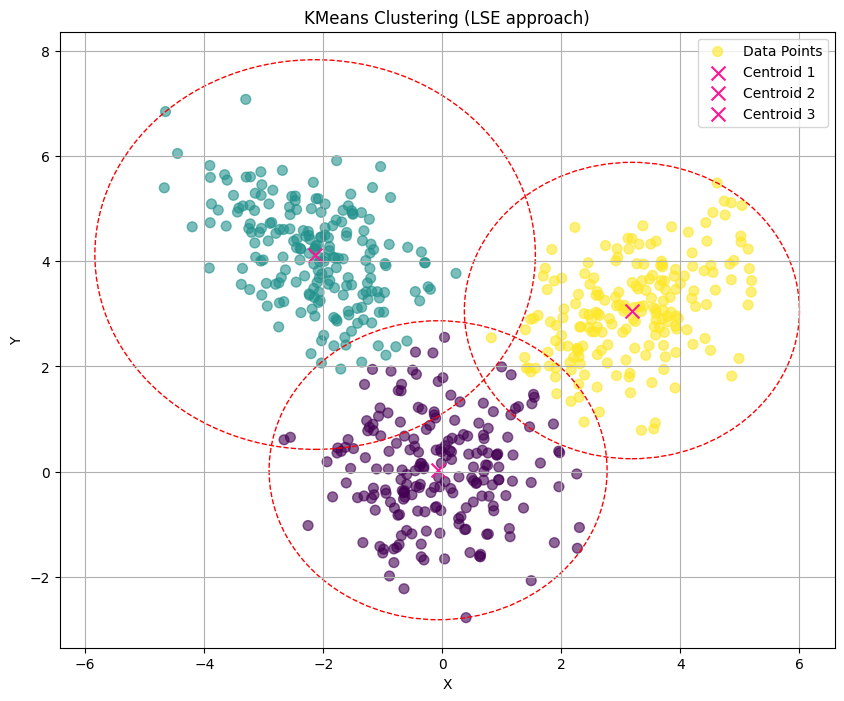

In [46]:
# Evaluation Cell

# Load the data from the file
X = load_data('Image.csv')
# Set the value of K
K = 3
# Cluster the data using K-means
M, U = kmeans(X, K)
# Plot the data and the centroids
plot_clusters(X, M, U)

 Analyze the results of the K-means-LSE clustering. How well do they match the underlying distributions? What are the advantages and disadvantages of this method? ``(5 pt.)``


Aligning with Underlying Distributions:

Advantages:

Simplicity: K-means stands out for its straightforward comprehension and implementation.

Efficiency: It exhibits computational efficiency, particularly when dealing with a considerable number of variables.

Scalability: Demonstrates adeptness in managing extensive datasets.

Disadvantages:

Assumes Spherical Clusters: K-means presupposes that clusters are spherical, uniform in size, and possess similar variability. In scenarios where the underlying distribution features non-spherical or differently sized clusters, K-means may exhibit suboptimal performance.

Sensitive to Initial Centroids: The algorithm's convergence is contingent upon the initial placement of centroids, and divergent initializations can yield disparate outcomes.

Assumes Equal Variance: K-means presupposes homogeneity in the variances of clusters, a presumption that may not hold true in real-world datasets characterized by diverse cluster shapes.

Recommendations:

Explore Alternative Algorithms: In cases where data deviates from the assumptions of K-means, consider employing algorithms like DBSCAN or Gaussian Mixture Models (GMM). These alternatives offer greater flexibility in accommodating diverse cluster shapes and sizes.

Multiple Initialization Runs: Execute K-means with multiple initializations and opt for the outcome demonstrating the lowest inertia.

Visualization:
Leverage visualizations to scrutinize the clusters and evaluate their alignment with the distribution of the data. Visual assessment through plotting aids in gauging the extent to which the identified clusters correspond with the inherent structure of the dataset.

- Part 4: Write a Python function called **elbow_method** that takes **X** and a list of possible values for **K** as inputs and returns a numpy vector **S** of the same size as the list. **S** should contain the **sum of squared errors (SSE)** for each value of **K**, where the SSE is defined as the sum of the squared distances between each point and its assigned centroid. Plot **S** versus **K** and use the **elbow method** to find the best value of **K** for the data. Explain your reasoning and show your work. ``(15 pt.)``

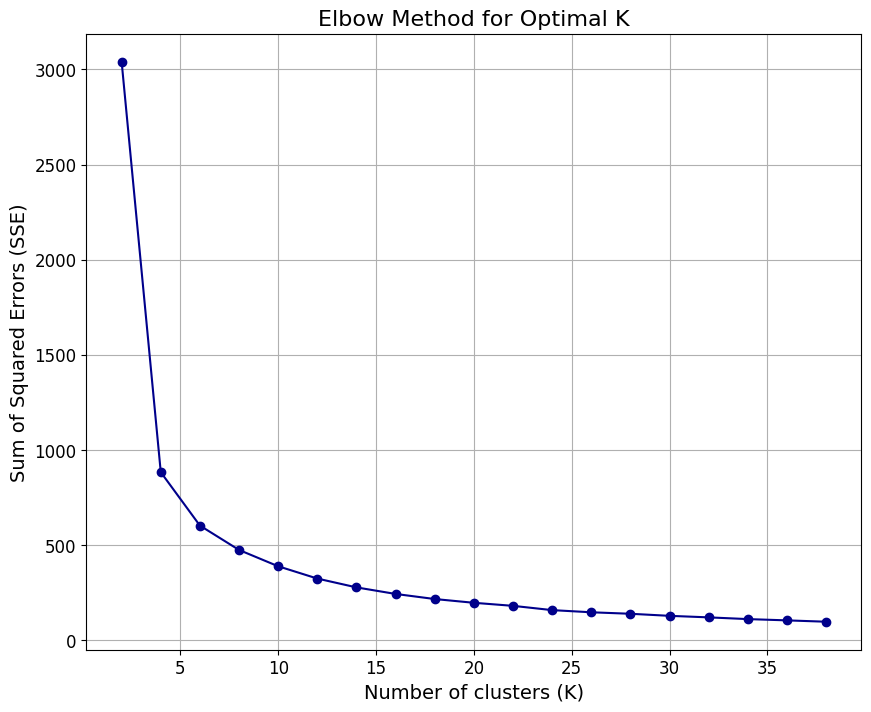

In [61]:
from sklearn.cluster import KMeans
import warnings

def elbow_method(X, K_values):
    sse = []
    warnings.filterwarnings("ignore")
    for k in K_values:
        model = KMeans(n_clusters=k, random_state=42).fit(X)
        sse.append(model.inertia_)
    return np.array(sse)

# Load data
X = load_data('Image.csv')

# Define range of K values
K_values = np.arange(2, 40, 2)

# Compute SSE values
sse_values = elbow_method(X, K_values)

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(K_values, sse_values, 'o-', color='darkblue')
plt.title('Elbow Method for Optimal K', fontsize=16)
plt.xlabel('Number of clusters (K)', fontsize=14)
plt.ylabel('Sum of Squared Errors (SSE)', fontsize=14)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 3. Sentiment Analysis using Linear Regression

### Introduction
Sentiment analysis is a technique used to determine the sentiment or opinion expressed in text data. In this assignment, we will explore the application of linear regression for sentiment analysis on a dataset of movies reviews. The goal is to build a model that can predict the sentiment score of new text documents based on the extracted features.

**Note: In this question, feel free to use built-in functions implemented in different python packages. One of the goals of this question is to make you familiar with using built-in functions in python**

### Import required packages and libraries

Make sure you have installed all of the following packages before.

Use the following command in terminal for installing packages.
```
pip install [package_name]
```

In [89]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

### Load and Inspect the Dataset

Load the "sentiment.csv" dataset and follow the instructions below:
1. Display the first 25 rows and its last 10 rows of the dataset.
2. Print the information about all columns of data frame.
3. plot the histogram of the sentiments scores.

``(5 pt.)``

In [65]:
# TODO: First 25 rows of the dataset

# Load the data
data = pd.read_csv('sentiment.csv')

# Set display options
pd.options.display.colheader_justify = 'left'
pd.options.display.unicode.ambiguous_as_wide = False

# Print the first 25 rows of the dataframe
print(data.iloc[:25])

    PhraseId  SentenceId Phrase                                              \
0    1        1           A series of escapades demonstrating the adage ...   
1    2        1           A series of escapades demonstrating the adage ...   
2    3        1                                                    A series   
3    4        1                                                           A   
4    5        1                                                      series   
5    6        1           of escapades demonstrating the adage that what...   
6    7        1                                                          of   
7    8        1           escapades demonstrating the adage that what is...   
8    9        1                                                   escapades   
9   10        1           demonstrating the adage that what is good for ...   
10  11        1                                     demonstrating the adage   
11  12        1                                     

In [66]:
# TODO: Last 10 rows of the dataset
print(df.tail(10))

      PhraseId  SentenceId Phrase                                              \
9990   9991     419                            this a comedy or serious drama   
9991   9992     419                                 a comedy or serious drama   
9992   9993     419                                               a comedy or   
9993   9994     419                                                  a comedy   
9994   9995     419                                             serious drama   
9995   9996     420         plays like some corny television production fr...   
9996   9997     420                          plays like some corny television   
9997   9998     420                                like some corny television   
9998   9999     420                                     some corny television   
9999  10000     420                                          corny television   

      Sentiment  
9990  2          
9991  2          
9992  2          
9993  2          
9994  2          


In [67]:
# TODO: information of columns 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PhraseId    10000 non-null  int64 
 1   SentenceId  10000 non-null  int64 
 2   Phrase      10000 non-null  object
 3   Sentiment   10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB
None


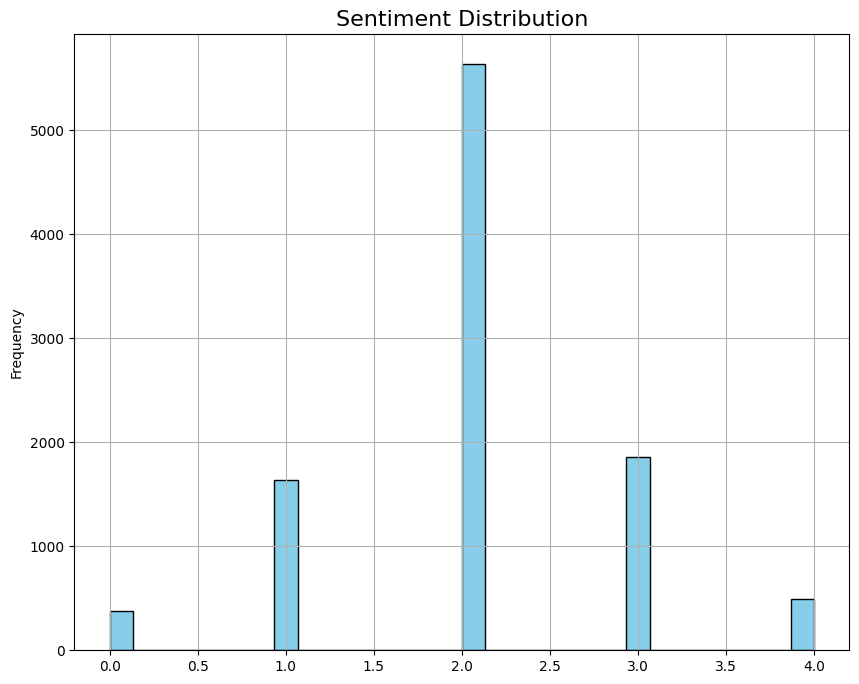

In [75]:
# TODO: histogram of sentiment scores
# Set the size of the plot
plt.figure(figsize=(10, 8))

# Plot the histogram with custom settings
df['Sentiment'].plot(kind='hist', color='skyblue', edgecolor='black', bins=30)

# Set the title and labels
plt.title('Sentiment Distribution', fontsize=16)

# Show the grid
plt.grid(True)

# Show the plot
plt.show()

Each sample contains a sentence or phrase which is a review comment about a movie, with is corresponding sentiment score which can be the following:
- 0 : negative
- 1 : somehow negative
- 2 : neutral
- 3 : somehow positive
- 4 : positive

### Preprocess the text data
In order to prepare our text data for regression analysis, we have to follow these steps:
1. Convert all text and words into lowercase
2. Removing punctuation marks such as exclamation marks, question marks, etc.
3. Creating a list of stop-words. Stop words are words that are frequently used in a language but typically do not carry significant meaning or contribute much to the sentiment of a sentence e.g. 'and', 'the', 'is', etc. **(Hint: use "re" package)**
4. Break down the text into individual words or tokens. Tokenization is a fundamental step that helps in analyzing the text at a granular level.

Comlpete the **"preprocess_text(text)"** function on the following code cell.

``(5 pt.)``

In [91]:

def preprocess_text(input_text):
    # Convert text to lowercase
    lower_text = input_text.lower()

    # Remove punctuation
    no_punct_text = lower_text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize the text
    tokens = word_tokenize(no_punct_text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    no_stopwords_text = [word for word in tokens if word not in stop_words]

    # Join the words back into one string
    cleaned_text = ' '.join(no_stopwords_text)

    return cleaned_text


In [93]:
# TODO: Apply the preprocessing function to the text column
data = pd.read_csv('sentiment.csv')

# Convert the dataframe to a numpy array
data_array = data.to_numpy()

# Apply the preprocess_text function to the third column of the array
processed_data = [preprocess_text(text) for text in data_array[:, 2]]

# Print the processed data
print(processed_data)

['series escapades demonstrating adage good goose also good gander occasionally amuses none amounts much story', 'series escapades demonstrating adage good goose', 'series', '', 'series', 'escapades demonstrating adage good goose', '', 'escapades demonstrating adage good goose', 'escapades', 'demonstrating adage good goose', 'demonstrating adage', 'demonstrating', 'adage', '', 'adage', 'good goose', '', 'good goose', '', 'good goose', '', 'good goose', 'good', 'goose', '', 'goose', 'goose', 'also good gander occasionally amuses none amounts much story', 'also good gander occasionally amuses none amounts much story', 'also', 'also', 'good gander occasionally amuses none amounts much story', 'gander occasionally amuses none amounts much story', 'gander occasionally amuses none amounts much story', 'gander', 'gander', 'gander', '', 'occasionally amuses none amounts much story', '', '', '', '', 'occasionally amuses none amounts much story', 'occasionally', 'amuses none amounts much story',

### Feature extraction
Feature extraction involves converting the processed text data into a format suitable for input to a machine learning model. The goal is to represent the text data in a way that captures relevant information for sentiment analysis.

Surf the net for the **"Bag-of-Words" (BoW)** technique. In a markdown cell explain this method and discuss how python built-in functions implement it.

Based on what you learned, extract the features.

``(10 pt.)``

## <font color="red"> TODO : discuss BoW method </font>

The Bag-of-Words (BoW) methodology serves as a widely employed and uncomplicated approach for translating textual information into a numerical format suitable for input into machine learning models. At its core, BoW involves crafting a lexicon encompassing all distinct words within a given corpus (a compilation of text documents) and subsequently expressing each document as a vector denoting word occurrences. Notably, word sequence is disregarded, and sole consideration is given to the presence or absence of words.

Tokenization: The initial step involves dissecting each document, be it a sentence or text, into discrete words or tokens.

Vocabulary Building: A distinctive set of words, known as the vocabulary, is constructed by pooling together all words found across the entire corpus.

Vectorization: Each document is then portrayed as a vector, where each component signifies the frequency or existence of a word from the established vocabulary. The vector's length corresponds to the vocabulary size.

Sparse Representation: Given that the majority of documents utilize only a fraction of the entire vocabulary, the resultant vectors often exhibit sparsity, mainly comprised of zeros.

Python offers a range of built-in functionalities and libraries for the seamless implementation of the Bag-of-Words technique. One notable library is the ''CountVectorizer'' within the scikit-learn library, which facilitates the creation and manipulation of BoW representations for efficient integration into machine learning workflows.

In [95]:
# TODO: Extract features from the preprocessed text data
# Load the data
data = pd.read_csv('sentiment.csv')

# Extract the text data
text_data = data.iloc[:, 2]

# Create the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the text data
document_vectors = vectorizer.fit_transform(text_data)

# Print the document vectors
print(document_vectors.toarray())


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Regression model

1. Split the dataset into training and testing sets using an appropriate ratio.
2. Train and fit a linear regression model to the train data
3. Evaluate the model's performance on the testing set. Calculate suitable evaluation metrics, such as mean squared error (MSE) 

**Note: Feel free to use built-in functions for this section**

``(5 pt.)``

In [100]:
# TODO: Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(document_vectors, df[:,3])

# TODO: Train a linear regression model
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

# TODO: Make predictions on the testing set
y_pred = linear_regressor.predict(x_test)

# TODO: Evaluate the model using mean squared error
mse = mean_squared_error(y_true = y_test,y_pred = y_pred)
print(mse)


0.4303853162898182


### Visualization

Visualize and scatter plot the actual vs. predicted sentiment scores for the model. Briefly interpret the results in a markdown cell.

``(5 pt.)``

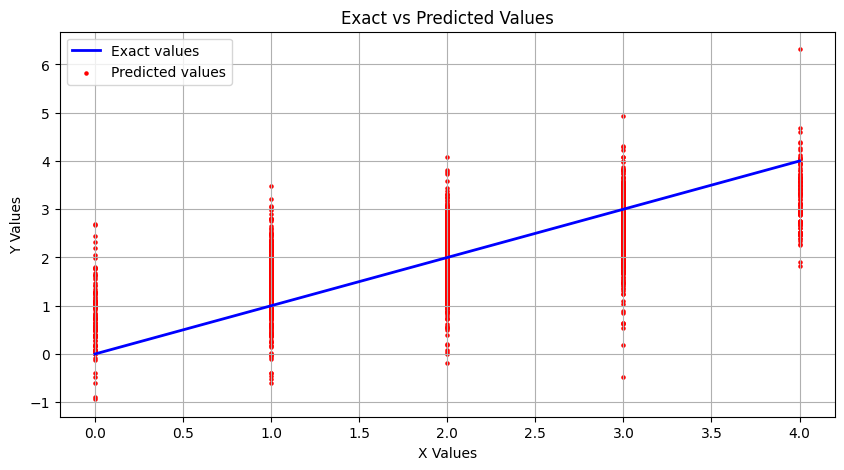

In [103]:

# Generate data
x_values = np.linspace(0, 4, 100)
y_values = x_values

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the exact values
ax.plot(x_values, y_values, linewidth=2, color='blue', label='Exact values')

# Scatter plot of the predicted values
ax.scatter(y_test, y_pred, s=5, color='red', label='Predicted values')

# Add grid, legend, and labels
ax.grid(True)
ax.legend()
ax.set_title('Exact vs Predicted Values')
ax.set_xlabel('X Values')
ax.set_ylabel('Y Values')

# Display the plot
plt.show()

## <font color="red"> Discuss the resulted figure </font>

The scatter plot serves as a visual tool for juxtaposing the sentiment scores obtained from the actual data (ground truth) against the predicted sentiment scores generated by the linear regression model. Each data point in the testing set is represented on this plot.

Ideal Prediction: In an ideal scenario, all data points would align perfectly along a diagonal line (y = x), signifying flawless predictions where the actual and predicted scores coincide.

Model Evaluation: The distribution of points around this diagonal line provides insights into how effectively the model captures the nuances in sentiment. Proximity to the diagonal line indicates more accurate predictions, reflecting the model's performance.

Identification of Outliers: Instances where points significantly deviate from the diagonal line, known as outliers, may signal areas where the model encountered challenges in accurately predicting sentiment.

By scrutinizing the scatter plot visually, we gain a holistic understanding of the model's overall performance. It allows us to pinpoint regions where enhancements may be necessary, providing valuable insights for refining the model and improving its predictive capabilities.

In the previous section you extracted the features using sklearn built-in function. In this section you are asked to implement and create the feature matrix from scratch.

``(10 pt.)``

In [104]:
# Extract all unique words
unique_words = set()
for sentence in df[:, 2]:
    unique_words.update(sentence.split())
unique_words = list(unique_words)

# Create a binary feature matrix
feature_matrix = []
for sentence in df[:, 2]:
    feature_row = [1 if word in sentence else 0 for word in unique_words]
    feature_matrix.append(feature_row)

# Print some of the unique words
print('Some unique words:', unique_words[:40])

# Print a sample of the feature matrix
print('Feature matrix sample:')
for row in feature_matrix[:5]:
    print(row[:40])

Some unique words: ['poem', 'path', 'downright', 'filmmaking', 'Manages', 'crafted', 'Ballesta', 'Even', 'once', 'Mostly', 'awkwardness', 'What', 'narrative', 'The', 'skittish', 'good-hearted', 'plodding', 'unfortunately', 'Traveler', 'affair', 'inexplicable', 'celebrates', 'every', 'lacks', 'pastiche', 'circumstances', 'Stewart', 'played', 'world', 'Now', 'expensive', 'loony', 'ending', 'sets', 'cinema', 'occasionally', 'Wayne', 'dungpile', 'bunch', 'Gaitskill']
Feature matrix sample:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 